# Project 1 : Product Reviews

In the highly competitive e-commerce industry, customer reviews play a vital role in shaping product perception and influencing purchase behavior. Ignoring negative feedback can result in customer attrition, damage to brand reputation, and significant financial setbacks. Thus, timely monitoring and analysis of customer sentiment are critical for preserving brand value and ensuring sustained business growth.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('Product_Reviews_dataset.csv')

In [5]:
dataset.head()

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE


In [6]:
dataset.tail()

,Product ID,Product Review,Sentiment
1002,AVpfo9ukilAPnD_xfhuj,This is not the same remote that I got for my ...,NEUTRAL
1003,AVpfo9ukilAPnD_xfhuj,I have had to change the batteries in this rem...,NEGATIVE
1004,AVpfo9ukilAPnD_xfhuj,"Remote did not activate, nor did it connect to...",NEGATIVE
1005,AVpfo9ukilAPnD_xfhuj,It does the job but is super over priced. I fe...,NEUTRAL
1006,AVpfo9ukilAPnD_xfhuj,I ordered this item to replace the one that no...,NEGATIVE


In [7]:
dataset.shape

(1007, 3)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      1007 non-null   object
 1   Product Review  1007 non-null   object
 2   Sentiment       1007 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB


In [9]:
dataset.nunique()

Product ID         66
Product Review    908
Sentiment           3
dtype: int64

In [10]:
dataset.duplicated().sum()

2

In [11]:
dataset = dataset.drop_duplicates()

In [12]:
dataset.duplicated().sum()

0

In [13]:
dataset.isnull().sum()

Product ID        0
Product Review    0
Sentiment         0
dtype: int64

In [14]:
print("Statistical Summary:")
print(dataset.describe(include='all'))

Statistical Summary:
                  Product ID  \
count                   1005   
unique                    66   
top     AVpfpK8KLJeJML43BCuD   
freq                     542   

                                           Product Review Sentiment  
count                                                1005      1005  
unique                                                908         3  
top     I'm a huge fan of the Echo family. I have two ...  POSITIVE  
freq                                                    6       850  


# Check class distribution for Sentiment

In [15]:
print("\nSentiment Value Counts:")
print(dataset['Sentiment'].value_counts())


Sentiment Value Counts:
Sentiment
POSITIVE    850
NEUTRAL      81
NEGATIVE     74
Name: count, dtype: int64


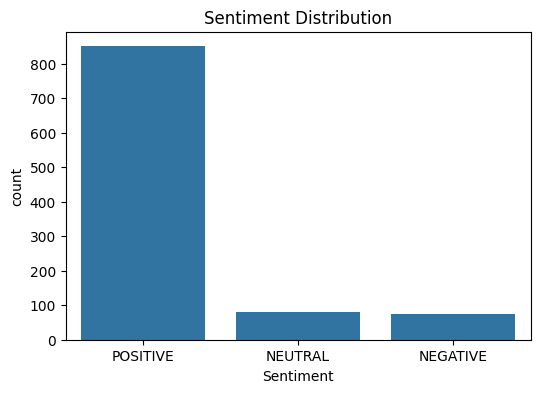

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=dataset)
plt.title("Sentiment Distribution")
plt.show()

# Check number of unique products

In [17]:
print("\nUnique Product IDs:", dataset['Product ID'].nunique())


Unique Product IDs: 66


# Top 5 products with most reviews

In [18]:
top_products = dataset['Product ID'].value_counts().head(5)
print("\nTop 5 Products by Number of Reviews:")
print(top_products)


Top 5 Products by Number of Reviews:
Product ID
AVpfpK8KLJeJML43BCuD    542
AVpfLiCSilAPnD_xWpk_     35
AVzRloqLGV-KLJ3aavBd     27
AVzRkFTFvKc47QAVd43-     18
AVsRjfwAU2_QcyX9PHqe     17
Name: count, dtype: int64


# Text Preprocessing

In [19]:
def remove_special_characters_no_re(text):
    return ''.join(char for char in text if char.isalnum() or char.isspace())

dataset['Cleaned_Review'] = dataset['Product Review'].apply(remove_special_characters_no_re)

# Lowerning

In [31]:
dataset['Cleaned_Review'] = dataset['Cleaned_Review'].str.lower()

In [33]:
dataset.loc[0:3, ['Product Review','Cleaned_Review']]

,Product Review,Cleaned_Review
0,I initially had trouble deciding between the p...,initially trouble deciding paperwhite voyage r...
1,Allow me to preface this with a little history...,allow preface little history casual reader own...
2,I am enjoying it so far. Great for reading. Ha...,enjoying far great reading original fire since...
3,I bought one of the first Paperwhites and have...,bought one first paperwhites pleased constant ...


# Remove extra white space

In [34]:
dataset['Cleaned_Review'] = dataset['Cleaned_Review'].str.strip().replace('\s+', ' ', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\197as\AppData\Local\Temp\ipykernel_19892\1968623561.py:1: SyntaxWarning: invalid escape sequence '\s'
  dataset['Cleaned_Review'] = dataset['Cleaned_Review'].str.strip().replace('\s+', ' ', regex=True)


# Remove stopwords from the text

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import nltk
print(nltk.__version__)

3.9.1


In [35]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))

dataset['Cleaned_Review'] = dataset['Cleaned_Review'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in nltk_stopwords])
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\197as\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* stemming - convert by removing suffix 
* lemmatization - To convert into dictionary root word
              - Convert into 

stemming 
1. running - run
2. studies - studi
3. flies - fli
4. happiness - happi

Lemmatization
1. running - run
2. studies - study
3. flies - fly
4. happiness - happy



In [36]:
# Stemming using NLTK (PorterStemmer)
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

words = ["running", "studies", "flies", "easily", "happiness"]

for word in words:
    print(f"{word} → {stemmer.stem(word)}")


running → run
studies → studi
flies → fli
easily → easili
happiness → happi


In [ ]:
# Lemmatization using NLTK (WordNetLemmatizer)
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4') 

lemmatizer = WordNetLemmatizer()

words = ["running", "studies", "flies", "better", "happiness"]

for word in words:
    print(f"{word} → {lemmatizer.lemmatize(word)}")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\197as\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\197as\AppData\Roaming\nltk_data...


running → running
studies → study
flies → fly
better → better
happiness → happiness


In [39]:
def apply_porter_stemmer(text):
   
    words = text.split()
    new_text = ' '.join([ps.stem(word) for word in words])
    return new_text

In [42]:
def apply_porter_stemmer(text): 
    words = text.split()
    new_text = ' '.join([stemmer.stem(word) for word in words])
    return new_text

dataset['Cleaned_Review'] = dataset['Cleaned_Review'].apply(apply_porter_stemmer)

## Text Vectorization




## 1. Bag of Words (BoW) using CountVectorizer
* 🔍 Idea:
Convert each document into a vector based on word counts, ignoring grammar and word order.

* ✅ Steps:
Build vocabulary of all unique words.

Count how many times each word occurs in each sentence.

* 🧠 Vocabulary:
  * Example Corpus (2 sentences)
  1. "I love NLP"
  2. "I love machine learning"

  ['I', 'love', 'NLP', 'machine', 'learning']
  
  (indexed as 0, 1, 2, 3, 4)

* 🧮 Vector Representation:
Each sentence becomes a 5-dimensional vector (length = number of unique words):

| Sentence | I | love | NLP | machine | learning |
| -------- | - | ---- | --- | ------- | -------- |
| 1        | 1 | 1    | 1   | 0       | 0        |
| 2        | 1 | 1    | 0   | 1       | 1        |


This is the BoW matrix.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vec = CountVectorizer(max_features=1000)
data_features_BOW = bow_vec.fit_transform(dataset['Cleaned_Review'])
data_features_BOW = data_features_BOW.toarray()
print("Shape of the feature vector", data_features_BOW.shape)
words = bow_vec.get_feature_names_out()

print("first 10 words", words[:10])
print("last 10 words", words[-10:])
df_BOW = pd.DataFrame(data_features_BOW, columns=words)
df_BOW.head()

Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '139' '15' '16' '16gb' '16level' '20' '2013' '2014']
last 10 words ['would' 'wouldnt' 'write' 'wrong' 'ye' 'year' 'yet' 'youll' 'your'
 'youtub']


,10,100,139,15,16,16gb,16level,20,2013,2014,...,would,wouldnt,write,wrong,ye,year,yet,youll,your,youtub
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0



* 🔍 Idea:
Not all words are equally important. Common words like "I" appear often but carry less meaning. TF-IDF lowers their weight.

* 🧠 Formula:
  * TF (term frequency) = (Number of times word appears in doc) / (Total words in doc)

  * IDF (inverse document frequency) = log(N / df),
where:

  * N = total number of documents

  * df = number of documents containing the word

  * TF-IDF = TF × IDF

* 🧮 For our example:
Let’s calculate for word “love” in Sentence 1:

TF("love", doc1) = 1 / 3 = 0.33

IDF("love") = log(2 / 2) = log(1) = 0

So, TF-IDF("love", doc1) = 0.33 × 0 = 0

Word “NLP”:

TF = 1/3

IDF = log(2 / 1) = 0.693

TF-IDF = 0.33 × 0.693 ≈ 0.23

* So common words (like "love") have low scores, and rare words (like "NLP") get higher weights.



In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
data_features_tfidf = tfidf.fit_transform(dataset['Cleaned_Review'])
data_features_tfidf = data_features_tfidf.toarray()
print("Shape of the feature vector",data_features_tfidf.shape)
words = tfidf.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])
df_tfidf = pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()


Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '139' '15' '16' '16gb' '16level' '20' '2013' '2014']
last 10 words ['would' 'wouldnt' 'write' 'wrong' 'ye' 'year' 'yet' 'youll' 'your'
 'youtub']


,10,100,139,15,16,16gb,16level,20,2013,2014,...,would,wouldnt,write,wrong,ye,year,yet,youll,your,youtub
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.117307,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.063824,0.00000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.27856,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.091897,0.077994,0.0,0.0,0.0,0.057667,0.00000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.048019,0.00000,0.000000,0.0,0.0



* 🔍 Idea:
Capture sequences of words instead of individual ones.

* ✅ For example:
Unigram (1-word): "I", "love", "NLP"

Bigram (2-words): "I love", "love NLP"

Trigram (3-words): "I love NLP"

For sentence 2:

Bigrams = "I love", "love machine", "machine learning"

So instead of:

[I, love, NLP, machine, learning]
The vocabulary becomes:

['I love', 'love NLP', 'love machine', 'machine learning']

And the vector representation is based on these bigrams.

In [47]:
ngram = CountVectorizer(max_features = 1000,ngram_range=(1, 2))
data_features_ngram = ngram.fit_transform(dataset['Cleaned_Review'])
data_features_ngram = data_features_ngram.toarray()
print("Shape of the feature vector",data_features_ngram.shape)
words = ngram.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])
df_ngram = pd.DataFrame(data_features_ngram, columns=ngram.get_feature_names_out())
df_ngram.head()

Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '15' '20' '2013' '2014' '2015' '2nd' '30' '300']
last 10 words ['ye' 'year' 'year kindl' 'year model' 'year old' 'yet' 'youll' 'your'
 'your read' 'youtub']


,10,100,15,20,2013,2014,2015,2nd,30,300,...,ye,year,year kindl,year model,year old,yet,youll,your,your read,youtub
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


## Model Building

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]

y = dataset['Sentiment']
results = []
for name, X in vectorized_datasets:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    
    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))

    
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))

results.sort(key=lambda x: x[1], reverse=True)

print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")





📊 Model Performance (Macro F1-scores):

NaiveBayes - BoW              : Macro F1 = 0.5765
NaiveBayes - N-gram           : Macro F1 = 0.5522
RandomForest - BoW            : Macro F1 = 0.5350
RandomForest - N-gram         : Macro F1 = 0.5047
RandomForest - TF-IDF         : Macro F1 = 0.4769
NaiveBayes - TF-IDF           : Macro F1 = 0.3414



✅ Best Model: NaiveBayes - BoW (Macro F1 = 0.5765)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.53      0.56      0.55        16
     NEUTRAL       0.28      0.29      0.29        17
    POSITIVE       0.90      0.89      0.90       168

    accuracy                           0.82       201
   macro avg       0.57      0.58      0.58       201
weighted avg       0.82      0.82      0.82       201



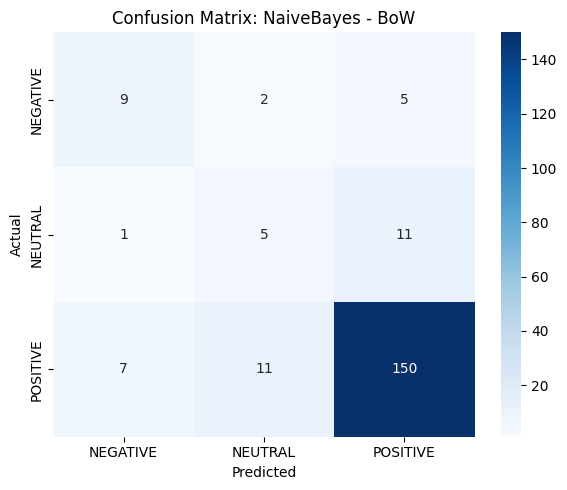

In [49]:

best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]
print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression
for name, X in vectorized_datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    lr_model = LogisticRegression(max_iter=1000, random_state=100)
    lr_model.fit(X_train, y_train)
    lr_preds = lr_model.predict(X_test)
    lr_f1 = f1_score(y_test, lr_preds, average='macro')
    results.append((f"LogisticRegression - {name}", lr_f1, lr_model, X_test, y_test, lr_preds))

results.sort(key=lambda x: x[1], reverse=True)

print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:35s}: Macro F1 = {f1_score_val:.4f}")


📊 Model Performance (Macro F1-scores):

NaiveBayes - BoW                   : Macro F1 = 0.5765
NaiveBayes - N-gram                : Macro F1 = 0.5522
RandomForest - BoW                 : Macro F1 = 0.5350
LogisticRegression - N-gram        : Macro F1 = 0.5189
RandomForest - N-gram              : Macro F1 = 0.5047
LogisticRegression - BoW           : Macro F1 = 0.4919
RandomForest - TF-IDF              : Macro F1 = 0.4769
LogisticRegression - TF-IDF        : Macro F1 = 0.3814
NaiveBayes - TF-IDF                : Macro F1 = 0.3414
